<font size="6">**Phân tích dữ liệu xu hướng mua sắm quần áo của khách hàng tại Mỹ** <br>
<font size="4">Xu hướng mua sắm của khách hàng hiện nay là một trong những mối quan tâm hàng đầu của các doanh nghiệp, đặc biệt là về ngành hàng quần áo, một ngành hàng mà khách hàng thường xuyên phải mua sắm. Trong bài này, chúng ta hãy cùng nhau phân tích và đánh giá dữ tập liệu này, đồng thời tạo ra một mô hình dự báo phù hợp để giúp các nhà hoạch định có thể tham khảo và điều chỉnh các chính sách phù hợp<br>

# Thu thập dữ liệu

Trước khi bắt đầu xây dựng mô hình phân tích xu hướng mua sắm của khách hàng, bước đầu tiên và không thể thiếu là thu thập dữ liệu liên quan đến hành vi mua sắm và đặc điểm của khách hàng. Việc này đảm bảo rằng chúng ta có nguồn dữ liệu đầy đủ và chính xác để phát triển mô hình phân tích hiệu quả, từ đó hiểu rõ hơn về các xu hướng và động lực thúc đẩy quyết định mua hàng. Tuy nhiên, do dữ liệu thực tế về khách hàng trong lĩnh vực bán lẻ thường khó tiếp cận vì các lý do bảo mật, nhóm chúng em đã sử dụng một bộ dữ liệu mẫu từ nền tảng Kaggle để thực hiện nghiên cứu và phân tích.

In [4]:
import pandas as pd
import numpy as np

In [5]:
dt = pd.read_csv('./Dataset_Demo3.csv', sep=';')
dt

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,"3,1",Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,"3,1",Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,NaN,Female,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,"3,1",Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,"3,5",Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,110.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,"2,7",Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,13895,56.0,Female,Blouse,Clothing,59.0,South Carolina,M,Beige,Fall,"2,7",Yes,Free Shipping,Yes,Yes,17.0,PayPal,Fortnightly
14096,13896,45.0,Female,Coat,Outerwear,48.0,West Virginia,S,Olive,Winter,"3,6",No,Express,Yes,Yes,4.0,Cash,Fortnightly
14097,13897,105.0,Female,Jewelry,Accessories,81.0,North Dakota,S,Gray,Summer,"4,2",No,Next Day Air,No,No,49.0,Credit Card,Weekly
14098,13898,104.0,Male,Jewelry,NaN,71.0,Alaska,S,Gray,Spring,"2,8",No,NaN,Yes,Yes,48.0,Venmo,Every 3 Months


# Tiền xử lý dữ liệu

<font size="4"> **Đọc và mô tả dữ liệu** <br>

In [8]:
dt.shape

(14100, 18)

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14100 entries, 0 to 14099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             14100 non-null  int64  
 1   Age                     13906 non-null  float64
 2   Gender                  14001 non-null  object 
 3   Item Purchased          13926 non-null  object 
 4   Category                13918 non-null  object 
 5   Purchase Amount (USD)   13915 non-null  float64
 6   Location                13907 non-null  object 
 7   Size                    13896 non-null  object 
 8   Color                   13926 non-null  object 
 9   Season                  13894 non-null  object 
 10  Review Rating           13896 non-null  object 
 11  Subscription Status     13893 non-null  object 
 12  Shipping Type           13913 non-null  object 
 13  Discount Applied        13944 non-null  object 
 14  Promo Code Used         13879 non-null

<font size="4"> **Kiểm tra dữ liệu bị lặp để xử lý** <br>

In [11]:
dt.duplicated().sum()

117

In [12]:
dt.drop_duplicates(inplace=True)
dt

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,"3,1",Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,"3,1",Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,NaN,Female,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,"3,1",Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,"3,5",Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,110.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,"2,7",Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,13895,56.0,Female,Blouse,Clothing,59.0,South Carolina,M,Beige,Fall,"2,7",Yes,Free Shipping,Yes,Yes,17.0,PayPal,Fortnightly
14096,13896,45.0,Female,Coat,Outerwear,48.0,West Virginia,S,Olive,Winter,"3,6",No,Express,Yes,Yes,4.0,Cash,Fortnightly
14097,13897,105.0,Female,Jewelry,Accessories,81.0,North Dakota,S,Gray,Summer,"4,2",No,Next Day Air,No,No,49.0,Credit Card,Weekly
14098,13898,104.0,Male,Jewelry,NaN,71.0,Alaska,S,Gray,Spring,"2,8",No,NaN,Yes,Yes,48.0,Venmo,Every 3 Months


<font size="4"> **Xóa những cột dữ liệu không cần thiết** <br>

In [14]:
col = ['Customer ID', 'Discount Applied','Promo Code Used','Payment Method', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Shipping Type']
dt= dt.drop(col, axis=1)
dt.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,55.0,Male,Blouse,Clothing,53.0,14.0,Fortnightly
1,19.0,Male,Sweater,Clothing,64.0,2.0,Fortnightly
2,NaN,Female,Jeans,Clothing,73.0,23.0,Weekly
3,21.0,Male,Sandals,Footwear,90.0,49.0,Weekly
4,110.0,Male,Blouse,Clothing,49.0,31.0,Annually


<font size="4"> **Di chuyển cột xuống cuối hàng để dễ dàng tách dữ liệu** <br>

In [16]:
df = pd.DataFrame(dt)
# Giả sử df là DataFrame ban đầu
column_to_move = 'Item Purchased'

# Đưa cột 'Item Purchased' ra khỏi DataFrame và lưu lại
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]
df

,Age,Gender,Category,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Item Purchased
0,55.0,Male,Clothing,53.0,14.0,Fortnightly,Blouse
1,19.0,Male,Clothing,64.0,2.0,Fortnightly,Sweater
2,NaN,Female,Clothing,73.0,23.0,Weekly,Jeans
3,21.0,Male,Footwear,90.0,49.0,Weekly,Sandals
4,110.0,Male,Clothing,49.0,31.0,Annually,Blouse
...,...,...,...,...,...,...,...
14095,56.0,Female,Clothing,59.0,17.0,Fortnightly,Blouse
14096,45.0,Female,Outerwear,48.0,4.0,Fortnightly,Coat
14097,105.0,Female,Accessories,81.0,49.0,Weekly,Jewelry
14098,104.0,Male,NaN,71.0,48.0,Every 3 Months,Jewelry


<font size="4"> **Kiểm tra dữ liệu Null hoặc NaN để xử lý** <br>

In [18]:
df.isnull().sum() 

Age                       192
Gender                     99
Category                  179
Purchase Amount (USD)     184
Previous Purchases        186
Frequency of Purchases    185
Item Purchased            173
dtype: int64

In [19]:
df.isna().sum() 

Age                       192
Gender                     99
Category                  179
Purchase Amount (USD)     184
Previous Purchases        186
Frequency of Purchases    185
Item Purchased            173
dtype: int64

Tiến hành xử lý dữ liệu bị Null và NaN

In [21]:
# Xử lý dữ liệu khuyết từng cột
# 1. Điền bằng trung bình hoặc trung vị cho dữ liệu số
df['Age'] = df['Age'].fillna(round(df['Age'].median()))
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(round(df['Purchase Amount (USD)'].mean()))
df['Previous Purchases'] = df['Previous Purchases'].fillna(round(df['Previous Purchases'].mean()))

# 2. Điền bằng giá trị thường xuyên nhất (mode) cho dữ liệu phân loại
categorical_cols = ['Gender', 'Category', 'Item Purchased']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

#Ít thường xuyên cho Frequency of Purchases
# Lặp qua các cột
categorical_cols1 = ['Frequency of Purchases']
for col in categorical_cols1:
    if col in df.columns:
        # Tính giá trị ít xuất hiện nhất trong mỗi cột
        value_counts = df[col].value_counts()
        least_frequent_value = value_counts.idxmin()
        
        # Thay thế 'Unknown' bằng giá trị ít xuất hiện nhất
        df[col] = df[col].replace('Unknown', least_frequent_value)

        # Điền các giá trị thiếu (NaN) trong cột 'Frequency of Purchases' bằng giá trị ít xuất hiện nhất
        df['Frequency of Purchases'] = df['Frequency of Purchases'].fillna(least_frequent_value)

# Kiểm tra lại dữ liệu khuyết sau xử lý
print("Kiểm tra dữ liệu khuyết sau xử lý:")
print(df.isnull().sum())

Kiểm tra dữ liệu khuyết sau xử lý:
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Previous Purchases        0
Frequency of Purchases    0
Item Purchased            0
dtype: int64


<font size="4"> **Xử lý giá trị vượt ngưỡng** <br>

In [23]:
# Lọc các giá trị lớn hơn 80 hoặc nhỏ hơn 16 trong cột 'Age'
age_over = df[(dt['Age'] > 80) | (df['Age'] < 16)]

# Kiểm tra và in ra các cột 'Customer ID' và 'Age'
if not age_over.empty:
    print("Cột 'Age' có giá trị vượt ngưỡng xác định.")
    print(age_over[['Age']])
else:
    print("Cột 'Age' không có giá trị vượt ngưỡng xác định")

Cột 'Age' có giá trị vượt ngưỡng xác định.
         Age
4      110.0
7      108.0
11     104.0
13     103.0
24     105.0
...      ...
14068  101.0
14072  105.0
14081  102.0
14097  105.0
14098  104.0

[2415 rows x 1 columns]


Nhận thấy cột AGE có khoảng 2372 dòng bị vượt ngưỡng nên ta tiến hành xử lý

In [25]:
# Tính giá trị trung bình của cột 'Age'
mean_age = round(df['Age'].mean())

# Xác định điều kiện trước khi thay thế
condition = (df['Age'] > 80) | (df['Age'] < 16)

# Thay thế các giá trị lớn hơn 80 hoặc nhỏ hơn 10 bằng giá trị trung bình
df.loc[condition, 'Age'] = mean_age

# Hiển thị các giá trị sau khi thay thế
print("Các giá trị sau khi thay thế:")
print(df[condition][['Age']])

Các giá trị sau khi thay thế:
        Age
4      55.0
7      55.0
11     55.0
13     55.0
24     55.0
...     ...
14068  55.0
14072  55.0
14081  55.0
14097  55.0
14098  55.0

[2415 rows x 1 columns]


<font size="4"> **Tiến hành mã hóa cột Frequency of Purchases** <br>

In [27]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding cho cột 'Frequency of Purchases'
le_item = LabelEncoder()
df['Frequency of Purchases'] = le_item.fit_transform(df['Frequency of Purchases'])

#Xem các lớp gốc và giá trị mã hóa
print("Lớp gốc và giá trị mã hóa:")
for idx, label in enumerate(le_item.classes_):
    print(f"{label}: {idx}")

# Kiểm tra kết quả
df

Lớp gốc và giá trị mã hóa:
Annually: 0
Bi-Weekly: 1
Every 3 Months: 2
Fortnightly: 3
Monthly: 4
Quarterly: 5
Weekly: 6


,Age,Gender,Category,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Item Purchased
0,55.0,Male,Clothing,53.0,14.0,3,Blouse
1,19.0,Male,Clothing,64.0,2.0,3,Sweater
2,50.0,Female,Clothing,73.0,23.0,6,Jeans
3,21.0,Male,Footwear,90.0,49.0,6,Sandals
4,55.0,Male,Clothing,49.0,31.0,0,Blouse
...,...,...,...,...,...,...,...
14095,56.0,Female,Clothing,59.0,17.0,3,Blouse
14096,45.0,Female,Outerwear,48.0,4.0,3,Coat
14097,55.0,Female,Accessories,81.0,49.0,6,Jewelry
14098,55.0,Male,Clothing,71.0,48.0,2,Jewelry


<font size="4"> **Di chuyển cột Item Purchased xuống cuối để dễ dàng tách bộ dữ liệu thành X và Y** <br>

In [29]:
# Giả sử df là DataFrame ban đầu
column_to_move = 'Item Purchased'

# Đưa cột 'Item Purchased' ra khỏi DataFrame và lưu lại
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]


In [30]:
df.head(5)

,Age,Gender,Category,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Item Purchased
0,55.0,Male,Clothing,53.0,14.0,3,Blouse
1,19.0,Male,Clothing,64.0,2.0,3,Sweater
2,50.0,Female,Clothing,73.0,23.0,6,Jeans
3,21.0,Male,Footwear,90.0,49.0,6,Sandals
4,55.0,Male,Clothing,49.0,31.0,0,Blouse


<font size="4"> **Tách bộ dữ liệu thành X và Y để tiến hành training** <br>

In [32]:
# Tạo tập dữ liệu Y
Y = df.iloc[:,-1].values
Y

array(['Blouse', 'Sweater', 'Jeans', ..., 'Jewelry', 'Jewelry', 'Sandals'],
      dtype=object)

In [33]:
#Tạo tập dữ liệu X
X = df.iloc[:, :-1].values
X

array([[55.0, 'Male', 'Clothing', 53.0, 14.0, 3],
       [19.0, 'Male', 'Clothing', 64.0, 2.0, 3],
       [50.0, 'Female', 'Clothing', 73.0, 23.0, 6],
       ...,
       [55.0, 'Female', 'Accessories', 81.0, 49.0, 6],
       [55.0, 'Male', 'Clothing', 71.0, 48.0, 2],
       [61.0, 'Male', 'Footwear', 46.0, 19.0, 2]], dtype=object)

<font size="4"> **Mã hóa các cột dữ liệu còn lại** <br>

Mã hóa Gender và Category của tập X

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder = "passthrough")
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 0.0, ..., 53.0, 14.0, 3],
       [0.0, 1.0, 0.0, ..., 64.0, 2.0, 3],
       [1.0, 0.0, 0.0, ..., 73.0, 23.0, 6],
       ...,
       [1.0, 0.0, 1.0, ..., 81.0, 49.0, 6],
       [0.0, 1.0, 0.0, ..., 71.0, 48.0, 2],
       [0.0, 1.0, 0.0, ..., 46.0, 19.0, 2]], dtype=object)

Mã hóa Item Purchased của tập Y

In [38]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([ 2, 23, 11, ..., 12, 12, 14])

# Trực quan hóa dữ liệu

<font size="4"> **Số lượng sản phẩm khách hàng đã mua** <br>

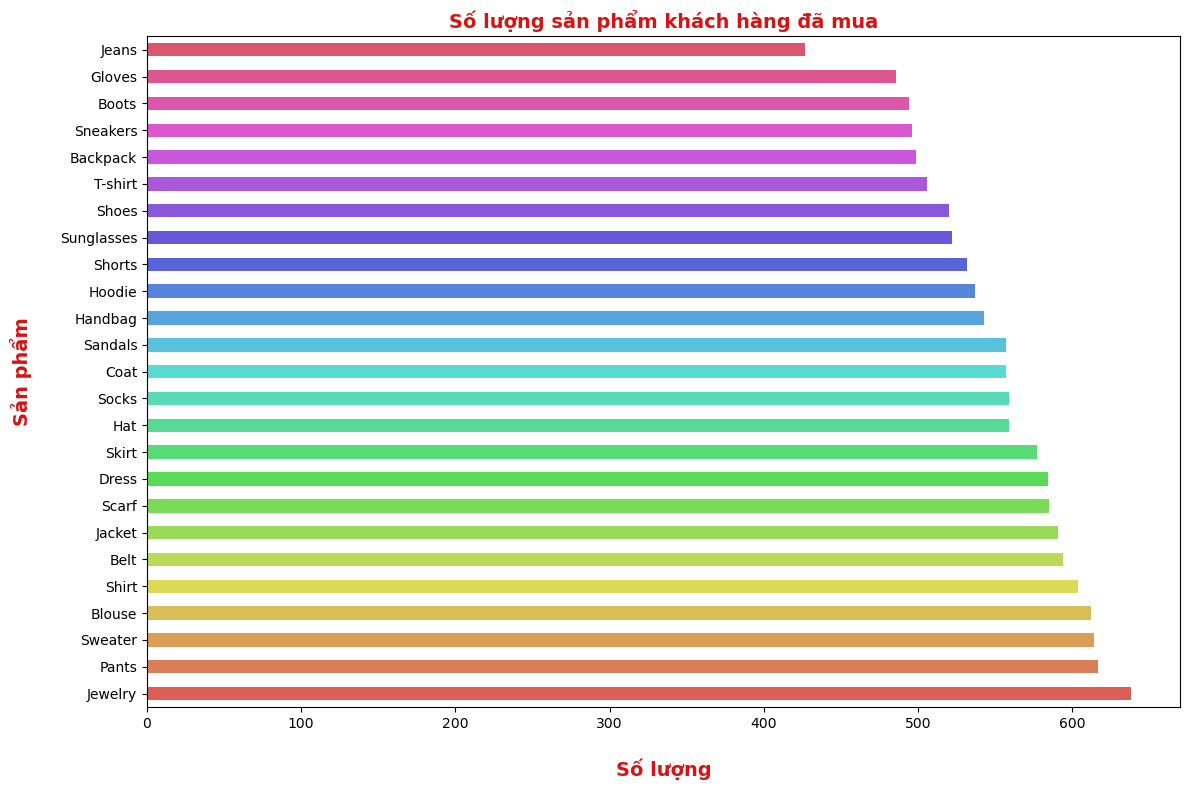

In [41]:
#Item Purchased - biểu đồ thanh đơn nằm ngang
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán số lượng mỗi sản phẩm đã mua
item_counts = dt['Item Purchased'].value_counts()
# Tạo biểu đồ thanh đơn nằm ngang
plt.figure(figsize=(12, 8))
#Tạo biểu đồ có yếu tố xen kẽ màu sắc
item_counts.plot(kind='barh', color=sns.color_palette("hls", len(item_counts)))
# Thêm tiêu đề, nhãn trục
plt.title('Số lượng sản phẩm khách hàng đã mua',weight="bold",color="#D71313", fontsize=14)
plt.xlabel('Số lượng',weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Sản phẩm',weight="bold", color="#D71313", fontsize=14, labelpad=20)
# Xoay nhãn trục x
plt.xticks(rotation = 0, ha = 'center')
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

<font size="4"> **Tần suất mua hàng theo danh mục mặt hàng** <br>

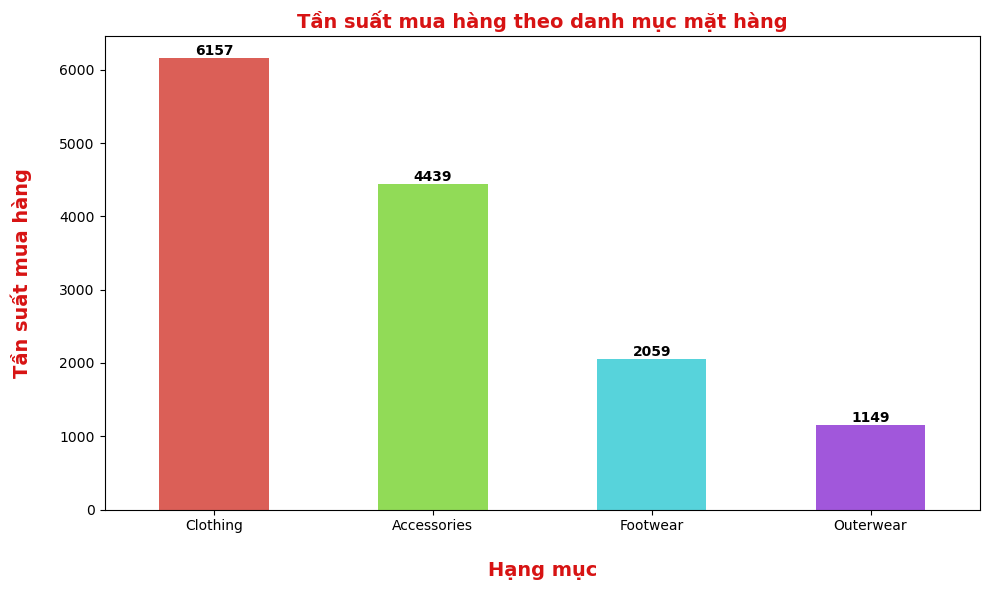

In [43]:
# Tạo biểu đồ cột dọc
plt.figure(figsize=(10, 6))
category_counts = dt['Category'].value_counts()
# Vẽ biểu đồ cột
ax = category_counts.plot(kind='bar', color=sns.color_palette("hls", len(category_counts)))
# Thêm tiêu đề và nhãn
plt.title('Tần suất mua hàng theo danh mục mặt hàng', weight="bold", color="#D71313", fontsize=14)
plt.xlabel('Hạng mục', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Tần suất mua hàng', weight="bold", color="#D71313", fontsize=14, labelpad=20)
# Điều chỉnh các thuộc tính khác của trục x
plt.xticks(rotation=0, ha='center')
# Thêm số liệu lên đầu mỗi cột
for i, v in enumerate(category_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', color='black', fontweight='bold')

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

<font size="4"> **Thói quen mua sắm** <br>

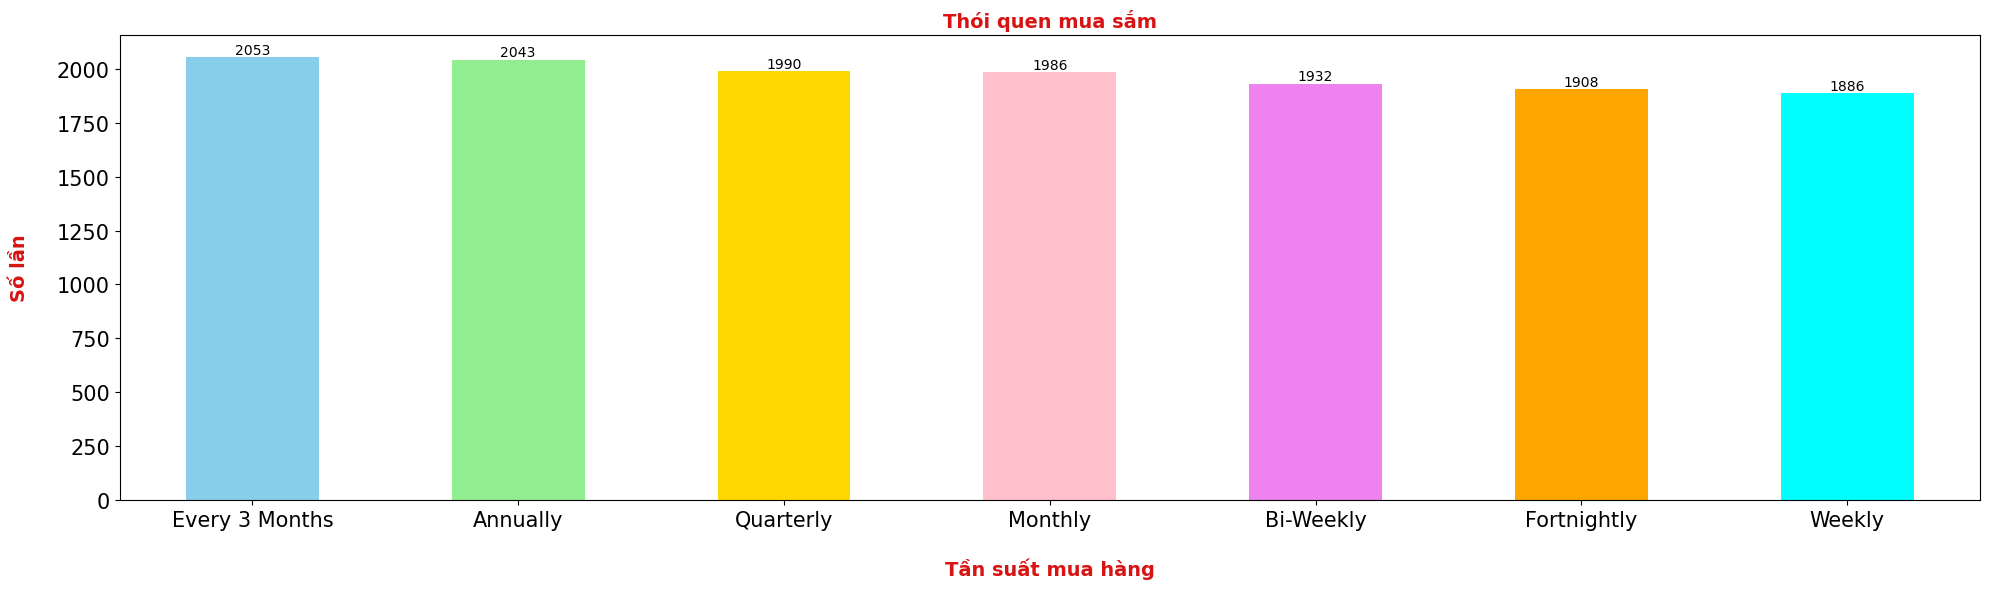

In [45]:
# Tạo biểu đồ Histogram
plt.figure(figsize=(20, 6))
colors = ['skyblue', 'lightgreen', 'gold', 'pink', 'violet', 'orange', 'cyan']
ax = dt['Frequency of Purchases'].value_counts().plot(kind='bar', color=colors, rot=0)
# Đặt nhãn cho các cột
ax.set_xticklabels(['Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'])
# Thêm giá trị lên các cột
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    ax.tick_params(axis='both', labelsize=15)
# Thêm tiêu đề và nhãn trục
plt.title('Thói quen mua sắm',weight="bold",color="#D71313", fontsize=14)
plt.xlabel('Tần suất mua hàng',weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Số lần',weight="bold", color="#D71313", fontsize=14, labelpad=20)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<font size="4"> **Tỷ lệ giới tính của khách hàng** <br>

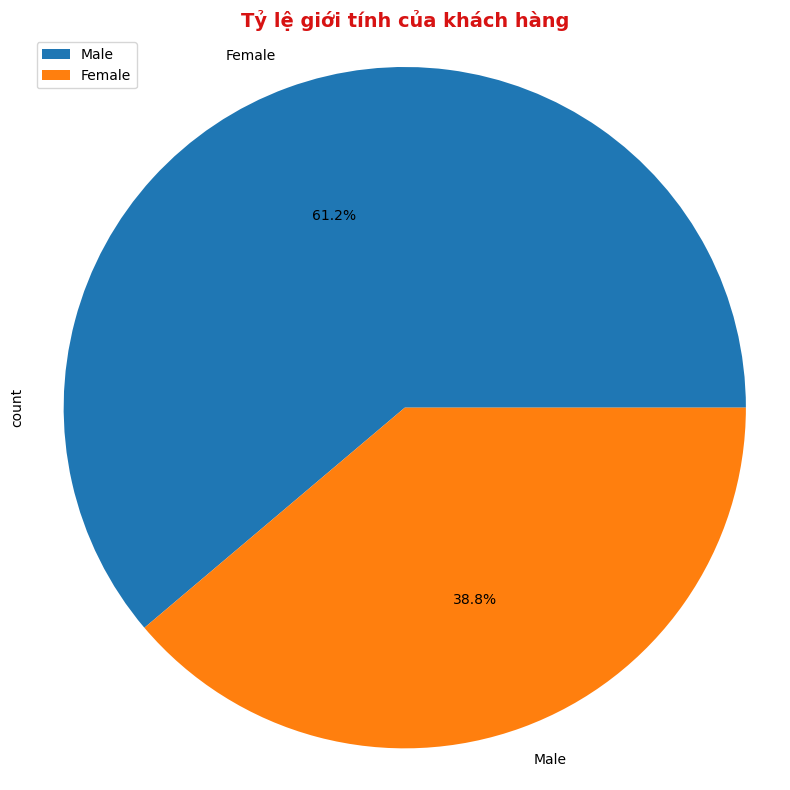

In [47]:
# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
dt['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỷ lệ giới tính của khách hàng',weight="bold",color="#D71313", fontsize=14)
plt.axis('equal')
plt.legend(labels=dt['Gender'].unique(), loc='upper left')
plt.tight_layout()
plt.show()

<font size="4"> **Phân bổ độ tuổi của khách hàng (tuổi)** <br>

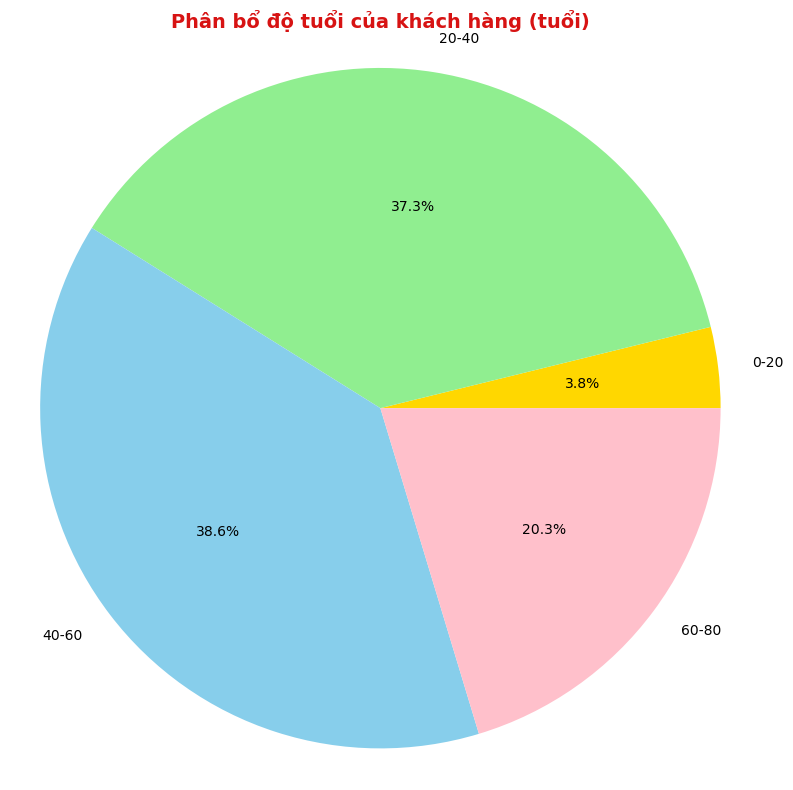

In [49]:
# Tạo biểu đồ hình tròn cho độ tuổi
plt.figure(figsize=(8, 8))
# Định nghĩa các khoảng tuổi và màu sắc tương ứng
age_ranges = [(0, 20, 'gold'), (20, 40, 'lightgreen'), (40, 60, 'skyblue'), (60, 80, 'pink')]
# Tính số lượng khách hàng trong mỗi khoảng tuổi
age_counts = []
for start, end, _ in age_ranges:
    count = dt[(dt['Age'] >= start) & (dt['Age'] < end)].shape[0]
    age_counts.append(count)
# Vẽ biểu đồ hình tròn
plt.pie(age_counts, labels=[f"{start}-{end}" for start, end, _ in age_ranges], colors=[color for _, _, color in age_ranges], autopct='%1.1f%%')
plt.title('Phân bổ độ tuổi của khách hàng (tuổi)',weight="bold",color="#D71313", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

<font size="4"> **Phân bố Số Lượng Giao Dịch theo Số Tiền Mua Hàng (USD)** <br>

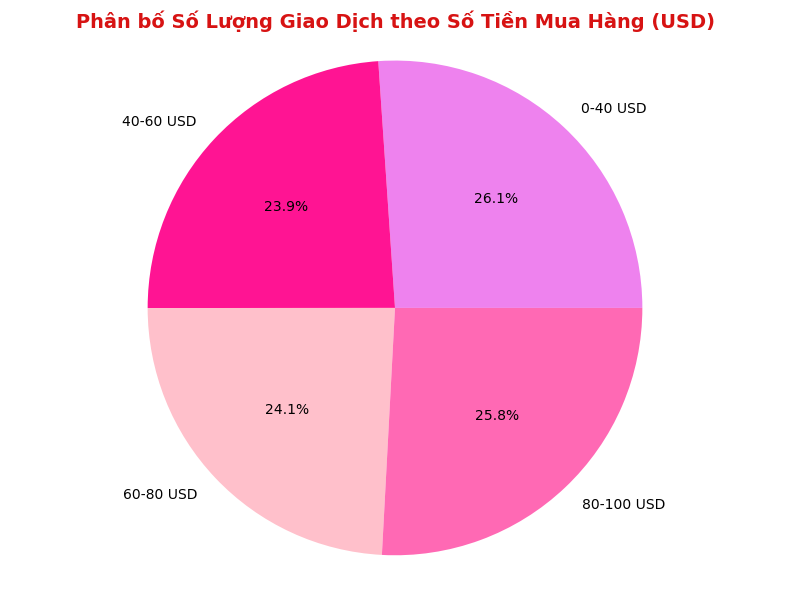

In [51]:
# Tạo biểu đồ hình tròn cho Purchased Amount
plt.figure(figsize=(8, 6))

# Định nghĩa các khoảng giá trị và màu sắc tương ứng
amount_ranges = [ (0, 40, 'violet'), (40, 60, 'deeppink'), (60, 80, 'pink'), (80, 100, 'hotpink')]

# Tính số lượng giao dịch trong mỗi khoảng giá trị
amount_counts = []
for start, end, _ in amount_ranges:
    count = dt[(dt['Purchase Amount (USD)'] >= start) & (dt['Purchase Amount (USD)'] < end)].shape[0]
    amount_counts.append(count)

# Vẽ biểu đồ hình tròn
plt.pie(amount_counts, labels=[f"{start}-{end} USD" for start, end, _ in amount_ranges], colors=[color for _, _, color in amount_ranges], 
        autopct='%1.1f%%')

# Thiết lập tiêu đề và phụ đề
plt.title('Phân bố Số Lượng Giao Dịch theo Số Tiền Mua Hàng (USD)',weight="bold",color="#D71313", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

<font size="4"> **Tần suất mua hàng** <br>

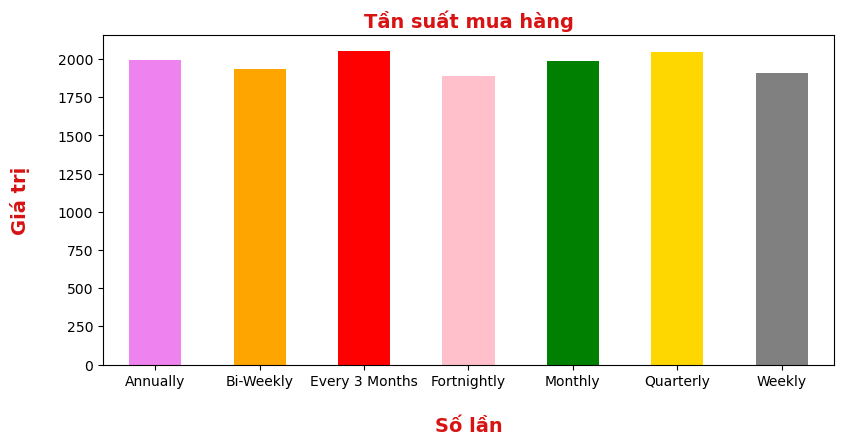

In [53]:
# Tạo biểu đồ cột dọc
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 3)
dt['Frequency of Purchases'].value_counts().sort_index().plot(kind='bar', color=['violet', 'orange','red','pink','green','gold','grey'])
plt.title('Tần suất mua hàng',weight="bold",color="#D71313", fontsize=14)
plt.xlabel('Số lần',weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Giá trị',weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.xticks(rotation = 0, ha = 'center')
#Hiển thị
plt.tight_layout()
plt.show()

<font size="4"> **Phân bố Số Lượng Giao Dịch theo Số Lần Mua Hàng Trước Đó** <br>

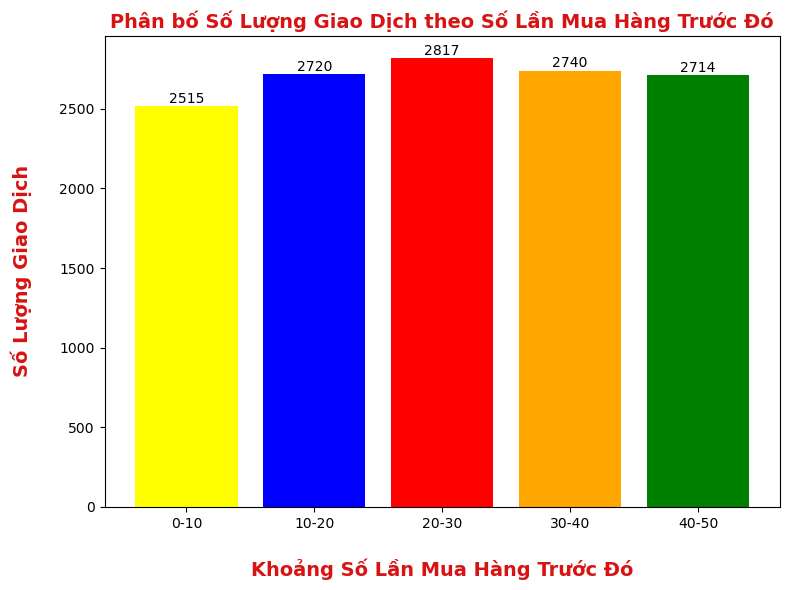

In [55]:
# Tạo biểu đồ cột dọc cho Previous Purchases
plt.figure(figsize=(8, 6))
# Định nghĩa các khoảng giá trị và màu sắc tương ứng
amount_ranges = [(0, 10, 'yellow'), (10, 20, 'blue'), (20, 30, 'red'), (30, 40, 'orange'), (40, 50, 'green')]
# Tính số lượng giao dịch trong mỗi khoảng giá trị
amount_counts = []
for start, end, _ in amount_ranges:
    count = dt[(dt['Previous Purchases'] >= start) & (dt['Previous Purchases'] < end)].shape[0]
    amount_counts.append(count)
# Vẽ biểu đồ cột dọc
bars = plt.bar(range(len(amount_counts)), amount_counts, color=[color for _, _, color in amount_ranges])
# Thiết lập tiêu đề và phụ đề
plt.title('Phân bố Số Lượng Giao Dịch theo Số Lần Mua Hàng Trước Đó', weight="bold", color="#D71313", fontsize=14)
plt.xlabel('Khoảng Số Lần Mua Hàng Trước Đó', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Số Lượng Giao Dịch', weight="bold", color="#D71313", fontsize=14, labelpad=20)
# Đặt nhãn cho trục x
plt.xticks(range(len(amount_ranges)), [f"{start}-{end}" for start, end, _ in amount_ranges])
# Thêm số liệu lên đầu các cột
for i, bar in enumerate(bars):
    yval = bar.get_height()  # Lấy chiều cao của cột (tương ứng với số lượng giao dịch)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), ha='center', va='bottom', color='black')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Huấn luyện mô hình dự đoán

<font size="4"> **Tách dữ liệu thành Training Dataset và Testing Dataset** <br>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [59]:
X_train

array([[0.0, 1.0, 1.0, ..., 29.0, 14.0, 2],
       [1.0, 0.0, 0.0, ..., 26.0, 15.0, 4],
       [1.0, 0.0, 0.0, ..., 76.0, 27.0, 1],
       ...,
       [1.0, 0.0, 1.0, ..., 68.0, 6.0, 5],
       [1.0, 0.0, 1.0, ..., 26.0, 40.0, 5],
       [0.0, 1.0, 1.0, ..., 75.0, 25.0, 0]], dtype=object)

In [60]:
X_test

array([[0.0, 1.0, 1.0, ..., 94.0, 17.0, 4],
       [1.0, 0.0, 0.0, ..., 44.0, 8.0, 6],
       [0.0, 1.0, 0.0, ..., 99.0, 42.0, 5],
       ...,
       [0.0, 1.0, 0.0, ..., 29.0, 35.0, 4],
       [1.0, 0.0, 0.0, ..., 98.0, 8.0, 1],
       [1.0, 0.0, 0.0, ..., 48.0, 33.0, 3]], dtype=object)

In [61]:
Y_train

array([15, 23, 24, ...,  8, 22,  1])

In [62]:
Y_test

array([ 1, 13, 16, ...,  9,  2, 19])

<font size="4"> **FEATURE SCALING** <br>

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,6:] = sc.fit_transform(X_train[:,6:])

In [65]:
X_train

array([[0.0, 1.0, 1.0, ..., -1.311864220912069, -0.7890178800799688,
        -0.4967887801984708],
       [1.0, 0.0, 0.0, ..., -1.4389967553780796, -0.719673653366159,
        0.5103297077082302],
       [1.0, 0.0, 0.0, ..., 0.6798788190554298, 0.1124570671995576,
        -1.0003480241518212],
       ...,
       [1.0, 0.0, 1.0, ..., 0.3408587271460683, -1.3437716937904465,
        1.0138889516615806],
       [1.0, 0.0, 1.0, ..., -1.4389967553780796, 1.013932014479084,
        1.0138889516615806],
       [0.0, 1.0, 1.0, ..., 0.6375013075667596, -0.026231386228061825,
        -1.5039072681051717]], dtype=object)

In [66]:
X_test[:,6:] = sc.transform(X_test[:,6:])

In [67]:
X_test

array([[0.0, 1.0, 1.0, ..., 1.4426740258514932, -0.5809851999385396,
        0.5103297077082302],
       [1.0, 0.0, 0.0, ..., -0.6762015485820162, -1.205083240362827,
        1.517448195614931],
       [0.0, 1.0, 0.0, ..., 1.654561583294844, 1.1526204679067034,
        1.0138889516615806],
       ...,
       [0.0, 1.0, 0.0, ..., -1.311864220912069, 0.6672108809100353,
        0.5103297077082302],
       [1.0, 0.0, 0.0, ..., 1.612184071806174, -1.205083240362827,
        -1.0003480241518212],
       [1.0, 0.0, 0.0, ..., -0.5066915026273354, 0.528522427482416,
        0.006770463754879704]], dtype=object)

<font size="4"> **Tìm ra mô hình phù hợp với bộ dữ liệu** <br>

In [69]:
#import các thư viện cần thiết
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
# Danh sách các mô hình hồi quy
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Gaussion NB': GaussianNB(),
    'XGB': xgb.XGBRegressor()
}
    
# Khởi tạo danh sách để lưu kết quả
results = []

# Lặp qua từng mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, Y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán các chỉ số đánh giá
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    
    # Lưu kết quả
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })
results

[{'Model': 'Linear Regression',
  'MAE': 5.513595895308924,
  'MSE': 43.18784553999213,
  'RMSE': 6.5717460039164735,
  'R²': 0.1556990891554112},
 {'Model': 'Random Forest',
  'MAE': 2.305273341726288,
  'MSE': 13.442361703717042,
  'RMSE': 3.6663826455672957,
  'R²': 0.737208511134432},
 {'Model': 'Decision Tree',
  'MAE': 1.7486651411136538,
  'MSE': 19.884455250444955,
  'RMSE': 4.459198947170327,
  'R²': 0.611268784777584},
 {'Model': 'Logistic Regression',
  'MAE': 7.0680778032036615,
  'MSE': 85.19450800915332,
  'RMSE': 9.230087107343751,
  'R²': -0.6655102798419861},
 {'Model': 'KNN',
  'MAE': 4.933981693363845,
  'MSE': 39.8029061784897,
  'RMSE': 6.3089544441602765,
  'R²': 0.22187297095796066},
 {'Model': 'Gaussion NB',
  'MAE': 6.907894736842105,
  'MSE': 82.48684210526316,
  'RMSE': 9.082226715143328,
  'R²': -0.6125767574508221},
 {'Model': 'XGB',
  'MAE': 3.3453911223381683,
  'MSE': 20.257104998885247,
  'RMSE': 4.500789375085803,
  'R²': 0.6039836674465331}]

Nhận thấy mô hình Random Forest:
Hệ số xác định R² = 75,09%: Điều này cho thấy mô hình Random Forest đã giải thích được 75% sự biến động của biến mục tiêu. Đây là một kết quả khá tốt, cho thấy mô hình có khả năng dự đoán khá tốt.
Hệ số MAE, MSE, RMSE: Các chỉ số này khá thấp, đặc biệt là khi so sánh với phạm vi giá trị của biến mục tiêu. Điều này cho thấy các dự đoán của mô hình khá gần với giá trị thực tế.543}

<font size="4"> **Tiến hành dùng RandomForest để train mô hình** <br>

In [73]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [74]:
rf_val_preds = rf_model.predict(X_test)

In [75]:
rf_val_preds[:5]

array([ 1.24      , 12.63      , 14.40666667, 20.05      ,  5.22083333])

Tạo một DataFrame so sánh giá trị Y_test và giá trị Y_pred (giá trị mô hình dự đoán)

In [77]:
pd.DataFrame({'y':Y_test, 'y_preds':rf_val_preds}).head(20)

,y,y_preds
0,1,1.240000
1,13,12.630000
2,16,14.406667
3,24,20.050000
4,2,5.220833
5,13,14.560000
6,1,2.350000
7,19,18.880000
8,15,11.390000
9,1,3.490000


Ta có thể tự điền đầu vào:

In [83]:
#                 Age, Male, Female, Clothing, Accesories, Outerwear, Footwear,   Purchase Amount (USD), Previous Purchases, Frequency of Purchases
rf_model.predict([[25,  0,      1,       1,       0,            0,        0,              46,                    5,                    3]])

array([8.11])